In [1]:
from Bio.Seq import Seq

In [2]:
dir(Seq)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'back_transcribe',
 'complement',
 'complement_rna',
 'count',
 'count_overlap',
 'encode',
 'endswith',
 'find',
 'index',
 'join',
 'lower',
 'lstrip',
 'reverse_complement',
 'reverse_complement_rna',
 'rfind',
 'rindex',
 'rsplit',
 'rstrip',
 'split',
 'startswith',
 'strip',
 'tomutable',
 'transcribe',
 'translate',
 'ungap',
 'upper']

In [3]:
# Create a sequence
seql = Seq('ATGATCTCGTAA')

In [4]:
seql

Seq('ATGATCTCGTAA')

In [5]:
protein_a = Seq('MIT')

In [6]:
protein_a

Seq('MIT')

In [7]:
# Length of seq
len(seql)

12

In [8]:
# Slicing
seql[0:3]

Seq('ATG')

In [9]:
# Reverse
seql[::-1]

Seq('AATGCTCTAGTA')

In [10]:
seq2 = Seq('ATGATCTCGTGG')

In [11]:
# Join seq
seql[0:6] + seq2

Seq('ATGATCATGATCTCGTGG')

In [12]:
# Find number of nucleotides
print(seql)
seql.count('G')

ATGATCTCGTAA


2

In [13]:
seql.count('A')

4

In [14]:
# Count number of codon
seql.count('ATG')

1

In [15]:
# Find position of a nucleotide
print(seql)
seql.find('G')

ATGATCTCGTAA


2

In [16]:
# Find position from the right
seql.rfind('G')

8

In [17]:
# Find location using index
seql.index('G')
seql.rindex('G')

8

In [18]:
# Plot of frequency
import matplotlib.pyplot as plt

In [19]:
from collections import Counter

In [20]:
seql

Seq('ATGATCTCGTAA')

In [21]:
dna_freq = Counter(seql)

In [22]:
dna_freq

Counter({'A': 4, 'T': 4, 'G': 2, 'C': 2})

<BarContainer object of 4 artists>

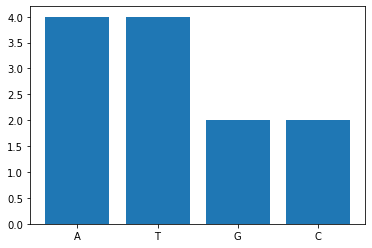

In [23]:
plt.bar(dna_freq.keys(), dna_freq.values())

In [24]:
from Bio.Seq import Seq

In [25]:
dna_seq = Seq('ATGATCTCGTAA')

In [26]:
len(dna_seq)

12

In [27]:
# Complement
dna_seq.complement()

Seq('TACTAGAGCATT')

In [28]:
# Reverse Complement
dna_seq.reverse_complement()

Seq('TTACGAGATCAT')

In [29]:
## Reverse complement with python function
dna_seq.complement()[::-1]

Seq('TTACGAGATCAT')

In [30]:
dna_seq

Seq('ATGATCTCGTAA')

In [31]:
# Transcription
# Convert DNA to mRNA
dna_seq.transcribe()

Seq('AUGAUCUCGUAA')

In [32]:
# Translation
# mRNA to Aminoacids
# * = stop codon
rna = dna_seq.transcribe()
rna.translate()

Seq('MIS*')

In [33]:
# Translation from DNA to Aminoacids
dna_seq.translate()

Seq('MIS*')

In [34]:
# Create custom stop codon symbol
rna.translate(stop_symbol="@")

Seq('MIS@')

In [35]:
# Back transcription
# mRNA to DNA
rna.back_transcribe()

Seq('ATGATCTCGTAA')

In [36]:
rna.back_transcribe() == dna_seq

True

In [37]:
# Convert AA to 3 letters
from Bio.SeqUtils import seq3,seq1

In [38]:
aa = dna_seq.translate()
aa

Seq('MIS*')

In [39]:
seq3(aa)

'MetIleSerTer'

In [40]:
seq1("MetIleSerTer")

'MIS*'

In [41]:
## View codon table
from Bio.Data import CodonTable
dir(CodonTable)

['AmbiguousCodonTable',
 'AmbiguousForwardTable',
 'CodonTable',
 'IUPACData',
 'NCBICodonTable',
 'NCBICodonTableDNA',
 'NCBICodonTableRNA',
 'TranslationError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ambiguous_dna_by_id',
 'ambiguous_dna_by_name',
 'ambiguous_generic_by_id',
 'ambiguous_generic_by_name',
 'ambiguous_rna_by_id',
 'ambiguous_rna_by_name',
 'generic_by_id',
 'generic_by_name',
 'list_ambiguous_codons',
 'list_possible_proteins',
 'make_back_table',
 'register_ncbi_table',
 'standard_dna_table',
 'standard_rna_table',
 'unambiguous_dna_by_id',
 'unambiguous_dna_by_name',
 'unambiguous_rna_by_id',
 'unambiguous_rna_by_name']

In [42]:
print(CodonTable.unambiguous_dna_by_name['Standard'])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [43]:
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [44]:
from Bio.SeqUtils import GC

In [45]:
dna_seq

Seq('ATGATCTCGTAA')

In [46]:
# Quanto maior a porcentagem de GC, maior o melting point (pois a molécula é mais estável)

GC(dna_seq)

33.333333333333336

In [47]:
## Custom function to get GC
dna_seq.count('G')

2

In [48]:
def gc_content(seq):
    result = float((seq.count('G') + seq.count('C')) / len(seq))
    return result
    
gc_content(dna_seq)
    

0.3333333333333333

In [49]:
def gc_content2(seq):
    gc = [ B for B in seq.upper() if B in 'GC' ]
    result = float(len(gc))/len(seq)
    return result
    
gc_content2(dna_seq)

0.3333333333333333

In [50]:
import Bio.SeqUtils
dir (Bio.SeqUtils)

['GC',
 'GC123',
 'GC_skew',
 'IUPACData',
 'Seq',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'cos',
 'molecular_weight',
 'nt_search',
 'pi',
 're',
 'seq1',
 'seq3',
 'sin',
 'six_frame_translations',
 'xGC_skew']

In [51]:
from Bio.SeqUtils import MeltingTemp as mt

In [52]:
dna_seq

Seq('ATGATCTCGTAA')

In [53]:
GC(dna_seq)

33.333333333333336

In [54]:
# get melting point using wallace (in celcius)
mt.Tm_Wallace(dna_seq)

32.0

In [55]:
# Check melting point using GC content
mt.Tm_GC(dna_seq)

23.32155893208184

In [56]:
# Check GC Skew
##
from Bio.SeqUtils import GC123,GC_skew,xGC_skew

In [57]:
dna_seq

Seq('ATGATCTCGTAA')

In [58]:
GC123(dna_seq)

(33.333333333333336, 0.0, 25.0, 75.0)

In [59]:
GC_skew(dna_seq)

[0.0]

In [60]:
GC_skew(dna_seq, 10)

[0.0, 0.0]

In [61]:
GC_skew('ATGGGGTCCCGCTC')

[0.0]

In [62]:
from Bio.SeqUtils import nt_search

In [63]:
s1 = Seq('ACTATT')
subseq = Seq('CTA')

In [64]:
nt_search(str(s1), str(subseq))

['CTA', 1]

In [65]:
## Sequence Alignment
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [66]:
seq1 = Seq('ACTCGT')
seq2 = Seq('ATTCG')

In [67]:
# Global Alignment
alignments = pairwise2.align.globalxx(seq1, seq2)
alignments

[Alignment(seqA='ACT-CGT', seqB='A-TTCG-', score=4.0, start=0, end=7),
 Alignment(seqA='AC-TCGT', seqB='A-TTCG-', score=4.0, start=0, end=7),
 Alignment(seqA='ACTCGT', seqB='ATTCG-', score=4.0, start=0, end=6)]

In [68]:
# Display the alignment
print(format_alignment(*alignments[0]))

ACT-CGT
| | || 
A-TTCG-
  Score=4



In [69]:
# View all
for a in alignments:
    print(format_alignment(*a))

ACT-CGT
| | || 
A-TTCG-
  Score=4

AC-TCGT
|  ||| 
A-TTCG-
  Score=4

ACTCGT
|.||| 
ATTCG-
  Score=4



In [70]:
local_alignments = pairwise2.align.localxx(seq1, seq2)
for a in local_alignments:
    print(format_alignment(*a))

1 ACT-CG
  | | ||
1 A-TTCG
  Score=4

1 AC-TCG
  |  |||
1 A-TTCG
  Score=4

1 ACTCG
  |.|||
1 ATTCG
  Score=4



In [71]:
alignment2 = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True, score_only=True)
alignment2

4.0

In [72]:
# Check similarity or percentage of similary using Alignment
print(seq1)
print(seq2)

ACTCGT
ATTCG


In [73]:
alignment2 / len(seq1) * 100

66.66666666666666

In [74]:
loc_alignment2 = pairwise2.align.localxx(seq1, seq2, one_alignment_only=True, score_only=True)
loc_alignment2

4.0

In [75]:
loc_alignment2 / len(seq1) * 100

66.66666666666666

In [76]:
# Global alignment with maximum similarity
glb_alignment = pairwise2.align.globalms(seq1, seq2, 2, -1, -0.5, -0.1)
glb_alignment

[Alignment(seqA='ACT-CGT', seqB='A-TTCG-', score=6.5, start=0, end=7),
 Alignment(seqA='AC-TCGT', seqB='A-TTCG-', score=6.5, start=0, end=7),
 Alignment(seqA='ACTCGT', seqB='ATTCG-', score=6.5, start=0, end=6)]

In [77]:
for a in glb_alignment:
    print(format_alignment(*a))

ACT-CGT
| | || 
A-TTCG-
  Score=6.5

AC-TCGT
|  ||| 
A-TTCG-
  Score=6.5

ACTCGT
|.||| 
ATTCG-
  Score=6.5



In [90]:
seqa = Seq('AAGGCTT')
seqb = Seq('AAGGC')
seqc = Seq('AAGGCAT')

In [82]:
AvB = pairwise2.align.localxx(seqa, seqb, one_alignment_only=True,score_only=True)
BvC = pairwise2.align.localxx(seqb, seqc, one_alignment_only=True,score_only=True)
AvC = pairwise2.align.localxx(seqa, seqc, one_alignment_only=True,score_only=True)

In [89]:
# Identity doesn't count gaps. It counts how much of the bases are exactly the same without gaps.
print('AvB', AvB/len(seqb) * 100) # 100% identity
print('BvC', AvB/len(seqb) * 100) # 100% identity
print('AvC', AvC/len(seqc) * 100) # 85% identity

AvB 100.0
BvC 100.0
AvC 85.71428571428571


In [93]:
# Similarity
# Hamming Distance
# Conta quantas letras são diferentes em cada posição (sequencias tem que ter o mesmo tamanho)
# Mede quantas mudanças precisam ser feitas para transformar um DNA igual ao outro
# Levenshtein distance
# Minimo numero de transformacoes que tem que fazer em uma sequencia para ficar igual a outra (mas pode ser feita em sequencias que nao tem mesmo tamanho)

def find_hamming_distance(seq_a, seq_b):
    return len([(x,y) for x,y in zip(seq_a, seq_b) if x != y])
    
seq_a = "AACTTAGCCGGACAATCCGGCCAGCCTGCTTGCGGAATGGACTTTGTAACAAAGATAATCCGCACGACTCTTAGTGCGGCCAAGACTTTGTTTGACATGTTATTGCTCGTGGCCAGATACTGTAATAATTGTGACTAAAGAGACGCCCGACGCAGGGGCAAGCGCGATGATGGTCGGTTAAGTTATACACATGTGCCCTATTCTCTGACCACTAGGCAGCGGGACCCCGAGGTTGAGAGTTAGACGCGTAGCAATGGAAAAAAGAGACAAGAGTCCATTGTGAATTGTAATCCACCTATAGAGGTATATGGCTAGGTGATCGTTATGATAACCCCTCGTGGGAGTATCCTATGGCGAGAGGTCACAGAGCTGAGAGATATGCACTCACATACAATAATATCGTACGGCTCAATGGTTACAAATATTTTACCTCATCGGTTAGGCCTCAGTACCCGCCCTCATTATCCACATAGGCTTATCCTACGTGTGCCATGAGGTCACTCTCCATTCGTAGATCACAACGTCACAGTAACAAATACTCGGGACCTACTCATCGGGTATGCAAGGTACATAGTTTTGTGTCTGCAGCCAATACATGTGGAGGCCTAGACCTATAAGTCGGACACTGCGGTACCGGTTGCGAAAATTAACTTGTTAAGACAATCAAAAGGCTAACTGGGGAGTATGGGTGTGGATGTGACATTACGCGATAGTCTTTTCGCTTGTCACCGGTATGCACGCGATAAATGGACCCGTGTCGACCTTTTTTCCTATCTTGGCTACGTAGAGGCTCAAAGACGTCGCTACCACTTCGCATCGCCACAGTTGATATATAAGTGAAGCAACAGATAACCGAAACGTAGCTTTCTACTCGCCGGGAATTCGGCAGCATCATACACCTGCTTCCGAACGTTATCGTGTAGTCCACAACTCAGTACTGCGAGCCAACCGCTGCCGGGGGAAGGTCCCCAAAATGCCTGCTGATATTTTTTCTAATATCTTCTGGTCTAGGTATCCTCACGTACCGGGTCTATAGTCATAGCCCACGGTTGACCGTTAAGAAGCTGTCCTTTTGTAATGTCTCGTTCCGGATCCAT"
seq_b = "GTTTGCTAATGGGGACCTATATATCTGTGATGGACTAAAGATTTCTACTAAAATTCCGACCTGAACGGTAGACCTGGCGGAGTAGGAAAAGGGCCCATGCAAAAAACAGTGCTTGGACGGTAACTGATTGGGCGCAGTGGGAAGCCTTGGTCCGGAGTTGGAGAAGTTTGTTGTAGTGTTTCTACGCTCGAGGCTGGCCCTCCACCACGATGCATTGATCGTACTTTATCGTGCACCCGGTGAGGGTCCCGTCTCGAAAGGTGAACGTCAGATCTCACTCTCGGGCCTCGACTCGTGTATGACACCCCTAATTCTCAGACTTTACATGGGGCGACTGAGCAGGGACACTTGACAAAAGCAGTCCGGCCACGAACAACCCGCTTCTACCGTTTCTGCTGCCATACAAGGTGCTTATCTGATCGACTTCATCGACTCTACCACCTAGCAGCGACACAGGTGTTCCCCGTTTATGCCTGGGCTACCGGTGACGCCGCGATCAAGTACCACTTAGATTCATTTCGGTTATAAAGGATCGCCAGAAGCATTCATAGCACGATCAGAACAAGCCTGTGCCGCTCAAGGGACTCCGATAAATGCTATCAATGTTTTGTCGATCCGTGCACCCATAATTGATCTGGCCAGAAGATACGTGAAGTGCACGAATTAGGTAAGAAGAAGGCTCCCTCTATAGACTTTTAACTTGGTGACCCCTCGCATCGTAATGCCTTTATCATAAAGGTTAGCCCGCCTTAGTGAGGAGCAGATAAACCTATGTTGCCGCCCCAATAAAGCAAAGTCCTGAATAACTTTTAGGGGCGCTGGTAGGTCCTGGGTCAATACAGATGGCATAAGTAATACTAATGGCACCGATAAGAAGAAGTTTACTTTGTCGAGGTATACTCCGGTCTCTCATCATCTAACACTGTGGAAAAGGGTCGAGTCCGTTGCTGTGTCATGACAAGCAAAGTTGGCAGGTCGGCGCCTGTGTTACATAACCCGGGCTCTGCCTCCAAAACAATCGGTTGGCCTAATAACCTTTAGAGCCCCTAGGTTAGCACCGAACAAGGCCTGCGCATTAGCACAGTCACCGTTGTGTC"
find_hamming_distance(seq_a, seq_b)

839

In [95]:
### Levenshtein
from Levenshtein import distance

In [97]:
seqa = 'ACCTG'
seqb = 'ACCT'
distance(seqa, seqb)

1

In [115]:
## Dot Plot
## Compare two sequences and identify regions of similarity between them
## Bota um ponto quanto nas duas sequencias tem um match

def delta(x,y):
    return 0 if x == y else 1

def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)
        
def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

In [116]:
seqx = "ACTTAG"
seqy = "AC"
dotplot(seqx,seqy)

 |AC
----
A|■ 
C| ■
T|  
T|  
A|■ 
G|  


In [117]:
dotplot(seqx,seqx)

 |ACTTAG
--------
A|■   ■ 
C| ■    
T|  ■■  
T|  ■■  
A|■   ■ 
G|     ■


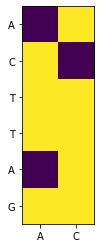

In [120]:
import numpy
import matplotlib.pyplot as plt
dotplot=plt.imshow(numpy.array(makeMatrix(seqx,seqy,1)))
xt=plt.xticks(numpy.arange(len(list(seqy))),list(seqy))
yt=plt.yticks(numpy.arange(len(list(seqx))),list(seqx))
plt.show()

In [121]:
def dotplotx(seq1, seq2):
    dotplot=plt.imshow(numpy.array(makeMatrix(seq1,seq2,1)))
    xt=plt.xticks(numpy.arange(len(list(seq2))),list(seq2))
    yt=plt.yticks(numpy.arange(len(list(seq1))),list(seq1))
    plt.show()

In [122]:
dna1 = Seq("ATGATCTCGTAA")
dna2 = Seq("ATTATGTCGTAA")

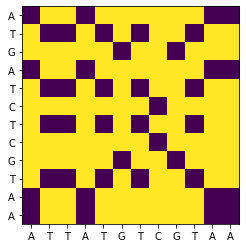

In [123]:
dotplotx(dna1, dna2)

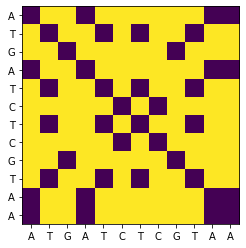

In [124]:
dotplotx(dna1,dna1)